# Importing necessary libraries

In [131]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [135]:
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names=column_names)

# Classification Task


## Converting class labels to numeric values


In [138]:
class_mapping = {'g': 1, 'h': 0}
df['class'] = df['class'].map(class_mapping)

## Balancing the data

In [145]:
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1].sample(len(class_0), random_state=42)
balanced_df = pd.concat([class_0, class_1]).sample(frac=1, random_state=42)

## Splitting the data

In [152]:
X = balanced_df.drop(columns=['class'])
y = balanced_df['class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Standardizing the values using StandardScaler

In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Testing multiple values of K

In [159]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
results = []
for k in k_values:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train_scaled, y_train)
   y_pred = knn.predict(X_val_scaled)
   results.append({
       'k': k,
       'accuracy': accuracy_score(y_val, y_pred),
       'precision': precision_score(y_val, y_pred),
       'recall': recall_score(y_val, y_pred),
       'f1_score': f1_score(y_val, y_pred)
   })
   print(f"k = {k}:")
   print(f"  Accuracy: {accuracy_score(y_val, y_pred):.4f}")
   print(f"  Precision: {precision_score(y_val, y_pred):.4f}")
   print(f"  Recall: {recall_score(y_val, y_pred):.4f}")
   print(f"  F1-Score: {f1_score(y_val, y_pred):.4f}")
   print("  Confusion Matrix:")
   print(confusion_matrix(y_val, y_pred))
   print()

k = 1:
  Accuracy: 0.7846
  Precision: 0.7663
  Recall: 0.8197
  F1-Score: 0.7921
  Confusion Matrix:
[[751 251]
 [181 823]]

k = 3:
  Accuracy: 0.7991
  Precision: 0.7734
  Recall: 0.8466
  F1-Score: 0.8084
  Confusion Matrix:
[[753 249]
 [154 850]]

k = 5:
  Accuracy: 0.8106
  Precision: 0.7791
  Recall: 0.8675
  F1-Score: 0.8209
  Confusion Matrix:
[[755 247]
 [133 871]]

k = 7:
  Accuracy: 0.8136
  Precision: 0.7793
  Recall: 0.8755
  F1-Score: 0.8246
  Confusion Matrix:
[[753 249]
 [125 879]]

k = 9:
  Accuracy: 0.8180
  Precision: 0.7805
  Recall: 0.8855
  F1-Score: 0.8297
  Confusion Matrix:
[[752 250]
 [115 889]]

k = 11:
  Accuracy: 0.8210
  Precision: 0.7807
  Recall: 0.8934
  F1-Score: 0.8333
  Confusion Matrix:
[[750 252]
 [107 897]]

k = 13:
  Accuracy: 0.8136
  Precision: 0.7720
  Recall: 0.8904
  F1-Score: 0.8270
  Confusion Matrix:
[[738 264]
 [110 894]]

k = 15:
  Accuracy: 0.8091
  Precision: 0.7684
  Recall: 0.8855
  F1-Score: 0.8228
  Confusion Matrix:
[[734 268]
 [

## Selecting the best K

In [162]:
best_k_index = np.argmax([r['accuracy'] for r in results])
best_k = k_values[best_k_index]
print(f"Best k value: {best_k} with validation accuracy: {results[best_k_index]['accuracy']:.4f}")

Best k value: 11 with validation accuracy: 0.8210


## Training the final model and evaluating it

In [165]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_test_pred = knn_best.predict(X_test_scaled)

## Printing the final evaluation


Final KNN Model Performance on Test Set:
Accuracy: 0.8077
Precision: 0.7782
Recall: 0.8761
F1-Score: 0.8242
Confusion Matrix:


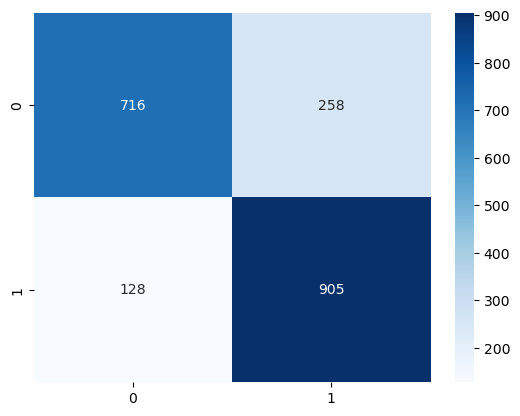

In [168]:
print("\nFinal KNN Model Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

## Plotting performance for all K values

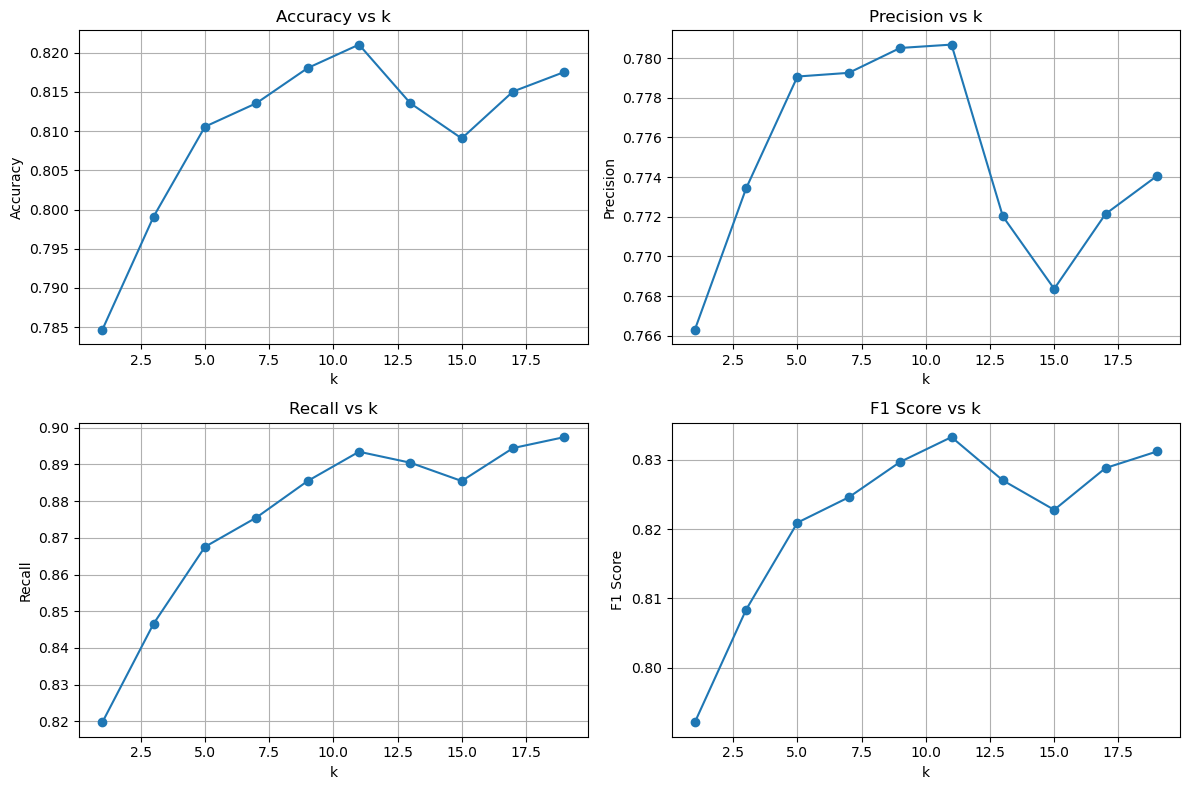

In [171]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(k_values, [r['accuracy'] for r in results], marker='o')
plt.title('Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(k_values, [r['precision'] for r in results], marker='o')
plt.title('Precision vs k')
plt.xlabel('k')
plt.ylabel('Precision')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(k_values, [r['recall'] for r in results], marker='o')
plt.title('Recall vs k')
plt.xlabel('k')
plt.ylabel('Recall')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(k_values, [r['f1_score'] for r in results], marker='o')
plt.title('F1 Score vs k')
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Regression Task

## Loading the data

In [199]:
housing_data = pd.read_csv("California_Houses.csv")

## Informations about the dataset


In [197]:
print("Dataset Shape:", housing_data.shape)
print("\nFirst few rows of the dataset:")
print(housing_data.head())
print("\nColumn information:")
print(housing_data.info())
print("\nSummary statistics:")
print(housing_data.describe())

Dataset Shape: (20640, 14)

First few rows of the dataset:
   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \

## Check for missing values

In [201]:
print(housing_data.isnull().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


## Split the data into features and target


In [203]:
X_housing = housing_data.drop('Median_House_Value', axis=1)
y_housing = housing_data['Median_House_Value']

## Split the data into training (70%), validation (15%), and testing (15%)

In [205]:
from sklearn.model_selection import train_test_split

X_train_h, X_temp_h, y_train_h, y_temp_h = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)
X_val_h, X_test_h, y_val_h, y_test_h = train_test_split(X_temp_h, y_temp_h, test_size=0.5, random_state=42)

## Data Split Sizes

In [207]:
print(f"Training set: {X_train_h.shape[0]} samples")
print(f"Validation set: {X_val_h.shape[0]} samples")
print(f"Testing set: {X_test_h.shape[0]} samples")

Training set: 14448 samples
Validation set: 3096 samples
Testing set: 3096 samples


## Z-score Normalization
Z-score normalization (standardization) transforms features to have a mean of 0 and standard deviation of 1. This is critical for regression models to ensure all features contribute equally to the model.

The formula for z-score normalization is:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} $$

Where:
- $j$ represents a feature/column in the dataset
- $\mu_j$ is the mean of feature $j$
- $\sigma_j$ is the standard deviation of feature $j$
- $x^{(i)}_j$ is the value of feature $j$ for example $i$

Benefits of normalization:
1. Ensures fair contribution of features with different scales
2. Improves convergence speed for gradient descent
3. Helps with numerical stability
4. Makes coefficient magnitudes comparable across features

In [209]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [211]:
X_train_h_scaled, mu, sigma = zscore_normalize_features(X_train_h)

X_val_h_scaled = (X_val_h - mu) / sigma
X_test_h_scaled = (X_test_h - mu) / sigma

# Applying Linear Regression
## Define gradient descent function for linear regression

# Applying Linear Regression
## Define gradient descent function for linear regression

# Linear Regression Cost Function
The cost function for linear regression measures the error between predicted and actual values. We use Mean Squared Error (MSE) as our objective function.

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

Where:
- $m$ is the number of training examples
- $f_{w,b}(x^{(i)}) = w \cdot x^{(i)} + b$ is the prediction for example $i$
- $y^{(i)}$ is the actual target value for example $i$
- $w$ and $b$ are the model parameters (weights and bias)

The factor of $\frac{1}{2}$ is a convention that simplifies the derivative calculation.

In [213]:
def compute_cost(X, y, w, b):
    """
    Compute the Mean Squared Error (MSE) cost function.
    """
    m = X.shape[0]  # Number of training examples
    predictions = np.dot(X, w) + b
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

# Gradient Computation
To minimize the cost function, we need to compute the partial derivatives with respect to the parameters $w$ and $b$. These derivatives tell us how to update the parameters in gradient descent.

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} $$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) $$

Where:
- $w_j$ is the weight for feature $j$
- $x_j^{(i)}$ is the value of feature $j$ for example $i$
- The other terms are as defined in the cost function

In [215]:
def compute_gradient(X, y, w, b):
    """
    Compute gradients for linear regression parameters.
    """
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    dj_dw = np.dot(X.T, errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db

# Gradient Descent Algorithm
Gradient descent is an iterative optimization algorithm for finding the minimum of the cost function. It works by updating the parameters in the opposite direction of the gradient.

For each iteration:
$$ w_j := w_j - \alpha \frac{\partial J}{\partial w_j} $$
$$ b := b - \alpha \frac{\partial J}{\partial b} $$

Where:
- $\alpha$ is the learning rate (step size)
- $\frac{\partial J}{\partial w_j}$ and $\frac{\partial J}{\partial b}$ are the partial derivatives

The learning rate $\alpha$ determines how large a step we take in the direction of the negative gradient. If $\alpha$ is too small, convergence will be slow. If it's too large, the algorithm may overshoot the minimum and fail to converge.

In [217]:
def gradient_descent(X, y, w, b, alpha, num_iters):
    """
    Perform batch gradient descent to optimize w and b.
    """
    cost_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")
    
    return w, b, cost_history

In [77]:
def predict(X, w, b):
    """
    Generate predictions using learned parameters.
    """
    return np.dot(X, w) + b

# Model Evaluation Metrics
We use multiple metrics to evaluate our regression models:

1. **Mean Squared Error (MSE)**:
   $$ MSE = \frac{1}{m} \sum_{i=1}^{m} (y_{pred}^{(i)} - y^{(i)})^2 $$

2. **Mean Absolute Error (MAE)**:
   $$ MAE = \frac{1}{m} \sum_{i=1}^{m} |y_{pred}^{(i)} - y^{(i)}| $$

3. **Root Mean Squared Error (RMSE)**:
   $$ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_{pred}^{(i)} - y^{(i)})^2} $$

Lower values of these metrics indicate better model performance. MSE and RMSE penalize larger errors more heavily than MAE. RMSE is particularly useful as it's in the same units as the target variable.

In [219]:
# Initialize model parameters
w_init = np.zeros(X_train_h_scaled.shape[1])
b_init = 0.0
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Train the model
w_final, b_final, cost_history = gradient_descent(X_train_h_scaled, y_train_h, w_init, b_init, alpha, iterations)

# Make predictions on the validation set
y_val_pred = predict(X_val_h_scaled, w_final, b_final)

# Compute performance metrics
mse_val = np.mean((y_val_pred - y_val_h) ** 2)
mae_val = np.mean(np.abs(y_val_pred - y_val_h))
rmse_val = np.sqrt(mse_val)

print("\nValidation Set:")
print(f"Mean Squared Error: {mse_val:.2f}")
print(f"Mean Absolute Error: {mae_val:.2f}")
print(f"Root Mean Squared Error: {rmse_val:.2f}")

# Test the model on the test set
y_test_pred = predict(X_test_h_scaled, w_final, b_final)

# Compute test performance metrics
mse_test = np.mean((y_test_pred - y_test_h) ** 2)
mae_test = np.mean(np.abs(y_test_pred - y_test_h))
rmse_test = np.sqrt(mse_test)

print("\nTest Set:")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"Root Mean Squared Error: {rmse_test:.2f}")

Iteration 0: Cost 27577059994.2481
Iteration 100: Cost 5787675817.6725
Iteration 200: Cost 3016082442.8218
Iteration 300: Cost 2622011229.5397
Iteration 400: Cost 2544073247.7819
Iteration 500: Cost 2513840526.1874
Iteration 600: Cost 2494182868.4871
Iteration 700: Cost 2479040929.6061
Iteration 800: Cost 2466857016.7979
Iteration 900: Cost 2456889302.2467

Validation Set:
Mean Squared Error: 5099618793.24
Mean Absolute Error: 52316.48
Root Mean Squared Error: 71411.62

Test Set:
Mean Squared Error: 4585260876.30
Mean Absolute Error: 50393.83
Root Mean Squared Error: 67714.55


"""
# Applying Lasso Regression (L1 Regularization)

Lasso regression adds L1 regularization to linear regression, which penalizes large coefficients using the sum of their absolute values. This promotes sparsity in the model and can be used for feature selection.

$$ \text{Cost} = MSE + \alpha \sum_{j=1}^{n} |w_j| $$

Where:
- MSE is the mean squared error
- $\alpha$ is the regularization strength
- $w_j$ are the feature weights
"""

In [220]:
def train_lasso_models(X_train, y_train, X_val, y_val):
    alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    best_alpha = None
    best_val_mse = float('inf')
    lasso_results = []
    
    for alpha in alpha_values:
        lasso_model = Lasso(alpha=alpha, max_iter=10000)
        lasso_model.fit(X_train, y_train)
        y_val_pred = lasso_model.predict(X_val)
        
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_mae = mean_absolute_error(y_val, y_val_pred)
        val_rmse = np.sqrt(val_mse)
        
        lasso_results.append({
            'alpha': alpha,
            'validation_mse': val_mse,
            'validation_mae': val_mae,
            'validation_rmse': val_rmse
        })
        
        print(f"Lasso (alpha={alpha}):")
        print(f"  Validation MSE: {val_mse:.2f}")
        print(f"  Validation MAE: {val_mae:.2f}")
        print(f"  Validation RMSE: {val_rmse:.2f}")
        
        if val_mse < best_val_mse:
            best_val_mse = val_mse
            best_alpha = alpha
    
    print(f"\nBest Lasso alpha: {best_alpha} with Validation MSE: {best_val_mse:.2f}")
    return best_alpha, lasso_results

In [223]:
best_lasso_alpha, lasso_results = train_lasso_models(X_train_h_scaled, y_train_h, X_val_h_scaled, y_val_h)

# Train the best Lasso model and evaluate on test set
best_lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=10000)
best_lasso_model.fit(X_train_h_scaled, y_train_h)

# Make predictions with best Lasso model
y_val_pred_lasso = best_lasso_model.predict(X_val_h_scaled)
y_test_pred_lasso = best_lasso_model.predict(X_test_h_scaled)

# Compute performance metrics for validation set
mse_val_lasso = mean_squared_error(y_val_h, y_val_pred_lasso)
mae_val_lasso = mean_absolute_error(y_val_h, y_val_pred_lasso)
rmse_val_lasso = np.sqrt(mse_val_lasso)

# Compute performance metrics for test set
mse_test_lasso = mean_squared_error(y_test_h, y_test_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test_h, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

print(f"\nLasso Regression (alpha={best_lasso_alpha}) - Final Results:")
print("\nValidation Set:")
print(f"Mean Squared Error: {mse_val_lasso:.2f}")
print(f"Mean Absolute Error: {mae_val_lasso:.2f}")
print(f"Root Mean Squared Error: {rmse_val_lasso:.2f}")

print("\nTest Set:")
print(f"Mean Squared Error: {mse_test_lasso:.2f}")
print(f"Mean Absolute Error: {mae_test_lasso:.2f}")
print(f"Root Mean Squared Error: {rmse_test_lasso:.2f}")


Lasso (alpha=0.001):
  Validation MSE: 4907212012.46
  Validation MAE: 50790.06
  Validation RMSE: 70051.50
Lasso (alpha=0.01):
  Validation MSE: 4907212148.34
  Validation MAE: 50790.07
  Validation RMSE: 70051.50
Lasso (alpha=0.1):
  Validation MSE: 4907213520.76
  Validation MAE: 50790.13
  Validation RMSE: 70051.51
Lasso (alpha=1.0):
  Validation MSE: 4907228606.53
  Validation MAE: 50790.78
  Validation RMSE: 70051.61
Lasso (alpha=10.0):
  Validation MSE: 4907515542.92
  Validation MAE: 50797.43
  Validation RMSE: 70053.66
Lasso (alpha=100.0):
  Validation MSE: 4923933009.24
  Validation MAE: 50975.80
  Validation RMSE: 70170.74

Best Lasso alpha: 0.001 with Validation MSE: 4907212012.46

Lasso Regression (alpha=0.001) - Final Results:

Validation Set:
Mean Squared Error: 4907212012.46
Mean Absolute Error: 50790.06
Root Mean Squared Error: 70051.50

Test Set:
Mean Squared Error: 4400953043.36
Mean Absolute Error: 48782.03
Root Mean Squared Error: 66339.68



# Ridge Regression (L2 Regularization)
Ridge regression adds L2 regularization to linear regression, which penalizes large coefficients using the sum of their squared values. This helps prevent overfitting and improves model generalization.

$$ \text{Cost} = MSE + \alpha \sum_{j=1}^{n} w_j^2 $$

Where:
- MSE is the mean squared error
- $\alpha$ is the regularization strength
- $w_j$ are the feature weights

Key characteristics of Ridge regression:
1. Shrinks coefficients toward zero but rarely exactly to zero
2. Handles multicollinearity effectively
3. All features remain in the model (unlike Lasso)
4. Performs well when many features are correlated

In [224]:
def train_ridge_models(X_train, y_train, X_val, y_val): 
    alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
    best_alpha = None 
    best_val_mse = float('inf') 
    ridge_results = [] 
     
    for alpha in alpha_values: 
        ridge_model = Ridge(alpha=alpha, max_iter=10000) 
        ridge_model.fit(X_train, y_train) 
        y_val_pred = ridge_model.predict(X_val) 
         
        val_mse = mean_squared_error(y_val, y_val_pred) 
        val_mae = mean_absolute_error(y_val, y_val_pred) 
        val_rmse = np.sqrt(val_mse) 
         
        ridge_results.append({ 
            'alpha': alpha, 
            'validation_mse': val_mse, 
            'validation_mae': val_mae, 
            'validation_rmse': val_rmse 
        }) 
         
        print(f"Ridge (alpha={alpha}):") 
        print(f"  Validation MSE: {val_mse:.2f}") 
        print(f"  Validation MAE: {val_mae:.2f}") 
        print(f"  Validation RMSE: {val_rmse:.2f}") 
         
        if val_mse < best_val_mse: 
            best_val_mse = val_mse 
            best_alpha = alpha 
     
    print(f"\nBest Ridge alpha: {best_alpha} with Validation MSE: {best_val_mse:.2f}") 
    return best_alpha, ridge_results

best_ridge_alpha, ridge_results = train_ridge_models(X_train_h_scaled, y_train_h, X_val_h_scaled, y_val_h) 
 
# Train the best Ridge model and evaluate on test set 
best_ridge_model = Ridge(alpha=best_ridge_alpha, max_iter=10000) 
best_ridge_model.fit(X_train_h_scaled, y_train_h) 
 
# Make predictions with best Ridge model 
y_val_pred_ridge = best_ridge_model.predict(X_val_h_scaled) 
y_test_pred_ridge = best_ridge_model.predict(X_test_h_scaled) 
 
# Compute performance metrics for validation set 
mse_val_ridge = mean_squared_error(y_val_h, y_val_pred_ridge) 
mae_val_ridge = mean_absolute_error(y_val_h, y_val_pred_ridge) 
rmse_val_ridge = np.sqrt(mse_val_ridge) 
 
# Compute performance metrics for test set 
mse_test_ridge = mean_squared_error(y_test_h, y_test_pred_ridge) 
mae_test_ridge = mean_absolute_error(y_test_h, y_test_pred_ridge) 
rmse_test_ridge = np.sqrt(mse_test_ridge) 



print(f"\nRidge Regression (alpha={best_ridge_alpha}) - Final Results:") 
print("\nValidation Set:") 
print(f"Mean Squared Error: {mse_val_ridge:.2f}") 
print(f"Mean Absolute Error: {mae_val_ridge:.2f}") 
print(f"Root Mean Squared Error: {rmse_val_ridge:.2f}") 
 
print("\nTest Set:") 
print(f"Mean Squared Error: {mse_test_ridge:.2f}") 
print(f"Mean Absolute Error: {mae_test_ridge:.2f}")
print(f"Root Mean Squared Error: {rmse_test_ridge:.2f}")

Ridge (alpha=0.001):
  Validation MSE: 4907212034.98
  Validation MAE: 50790.06
  Validation RMSE: 70051.50
Ridge (alpha=0.01):
  Validation MSE: 4907212376.45
  Validation MAE: 50790.10
  Validation RMSE: 70051.50
Ridge (alpha=0.1):
  Validation MSE: 4907216086.18
  Validation MAE: 50790.42
  Validation RMSE: 70051.52
Ridge (alpha=1.0):
  Validation MSE: 4907281049.44
  Validation MAE: 50793.61
  Validation RMSE: 70051.99
Ridge (alpha=10.0):
  Validation MSE: 4909605614.53
  Validation MAE: 50829.83
  Validation RMSE: 70068.58
Ridge (alpha=100.0):
  Validation MSE: 4939154719.42
  Validation MAE: 51167.60
  Validation RMSE: 70279.12

Best Ridge alpha: 0.001 with Validation MSE: 4907212034.98

Ridge Regression (alpha=0.001) - Final Results:

Validation Set:
Mean Squared Error: 4907212034.98
Mean Absolute Error: 50790.06
Root Mean Squared Error: 70051.50

Test Set:
Mean Squared Error: 4400952696.86
Mean Absolute Error: 48782.03
Root Mean Squared Error: 66339.68


In [225]:
# Import required libraries if not already imported
import seaborn as sns

# Let's organize our results for comparison
models = ['Linear Regression', 'Lasso (α=0.001)', 'Ridge (α=0.001)']

# Validation set metrics
val_mse = [mse_val, mse_val_lasso, mse_val_ridge]
val_mae = [mae_val, mae_val_lasso, mae_val_ridge]
val_rmse = [rmse_val, rmse_val_lasso, rmse_val_ridge]

# Test set metrics
test_mse = [mse_test, mse_test_lasso, mse_test_ridge]
test_mae = [mae_test, mae_test_lasso, mae_test_ridge]
test_rmse = [rmse_test, rmse_test_lasso, rmse_test_ridge]

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame({
    'Model': models,
    'Val_MSE': val_mse,
    'Val_MAE': val_mae,
    'Val_RMSE': val_rmse,
    'Test_MSE': test_mse,
    'Test_MAE': test_mae,
    'Test_RMSE': test_rmse
})

print("Model Comparison Summary:")
comparison_df

Model Comparison Summary:


,Model,Val_MSE,Val_MAE,Val_RMSE,Test_MSE,Test_MAE,Test_RMSE
0,Linear Regression,5.099619e+09,52316.478318,71411.615254,4.585261e+09,50393.827884,67714.554390
1,Lasso (α=0.001),4.907212e+09,50790.060988,70051.495433,4.400953e+09,48782.031545,66339.679253
2,Ridge (α=0.001),4.907212e+09,50790.063882,70051.495594,4.400953e+09,48782.033312,66339.676641


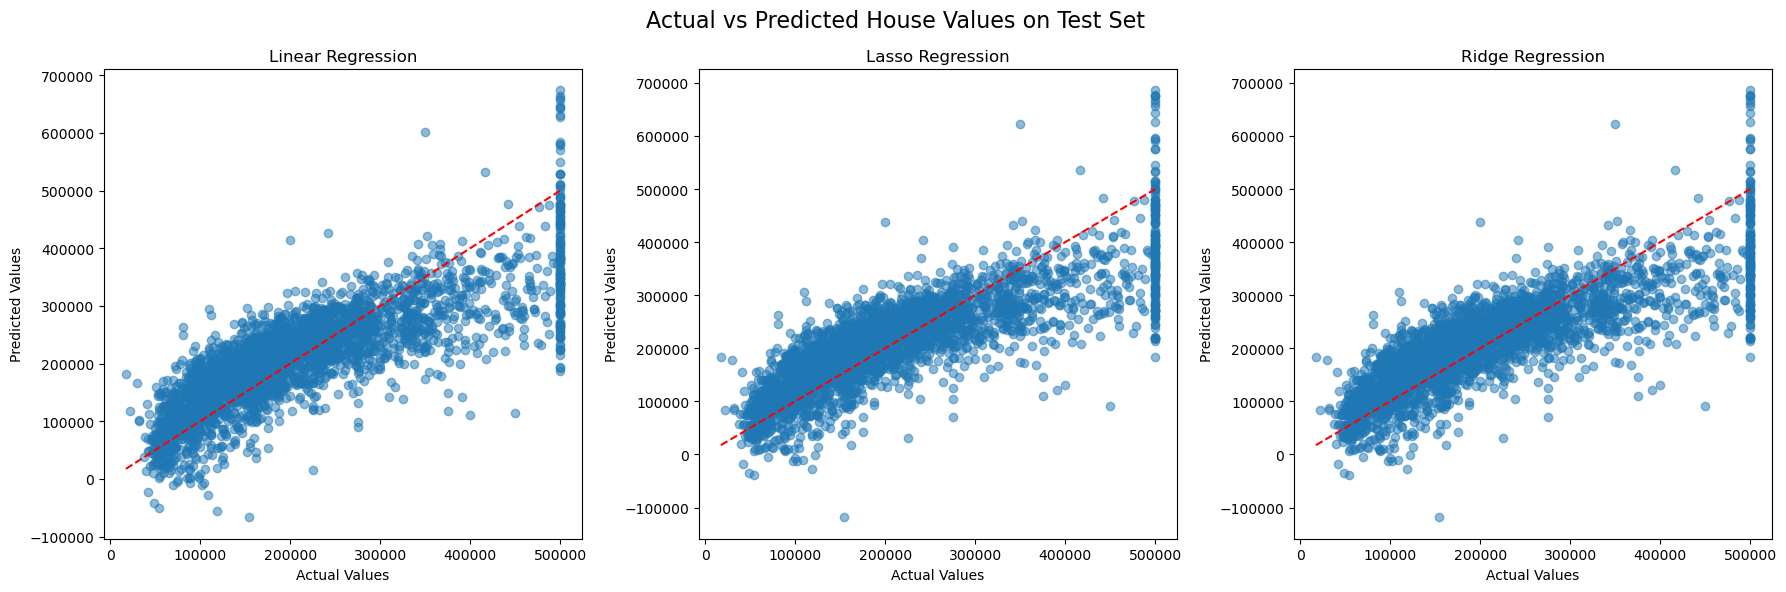

In [229]:
# Create scatter plots to visualize actual vs predicted values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Actual vs Predicted House Values on Test Set', fontsize=16)

# Linear Regression
axes[0].scatter(y_test_h, y_test_pred, alpha=0.5)
axes[0].plot([y_test_h.min(), y_test_h.max()], [y_test_h.min(), y_test_h.max()], 'r--')
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

# Lasso Regression
axes[1].scatter(y_test_h, y_test_pred_lasso, alpha=0.5)
axes[1].plot([y_test_h.min(), y_test_h.max()], [y_test_h.min(), y_test_h.max()], 'r--')
axes[1].set_title('Lasso Regression')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')

# Ridge Regression
axes[2].scatter(y_test_h, y_test_pred_ridge, alpha=0.5)
axes[2].plot([y_test_h.min(), y_test_h.max()], [y_test_h.min(), y_test_h.max()], 'r--')
axes[2].set_title('Ridge Regression')
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

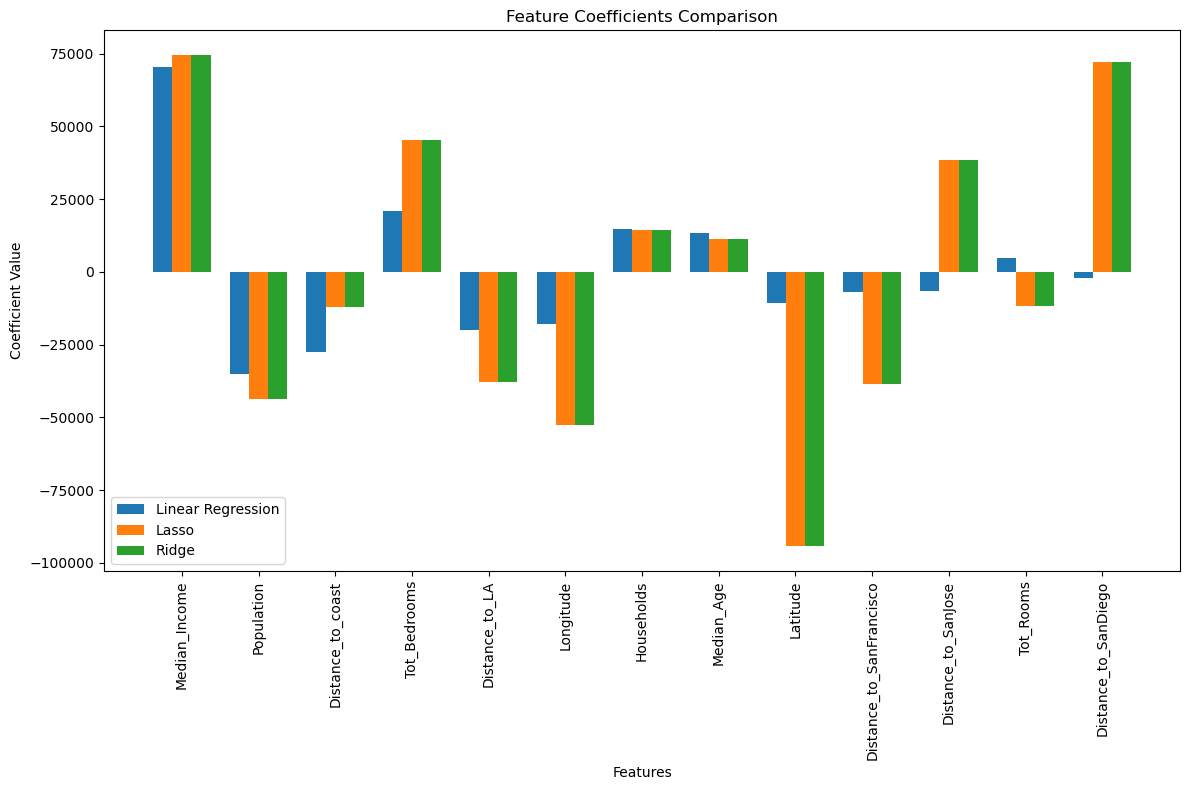

,Feature,Linear_Regression,Lasso,Ridge
0,Median_Income,70598.715611,74598.410599,74598.403215
4,Population,-35208.078316,-43788.908563,-43788.904439
8,Distance_to_coast,-27695.811846,-12109.850646,-12109.963168
3,Tot_Bedrooms,20915.693885,45300.535751,45300.547009
9,Distance_to_LA,-20144.477778,-37716.281058,-37716.031425
7,Longitude,-18039.358992,-52484.057956,-52484.284509
5,Households,14588.961064,14451.050130,14451.030690
1,Median_Age,13344.163250,11265.748433,11265.769595
6,Latitude,-10861.448806,-94385.964733,-94384.311925
12,Distance_to_SanFrancisco,-6820.789043,-38574.116295,-38573.497464


In [231]:
# Let's examine and compare feature importance/coefficients across models
feature_names = X_housing.columns

# Create DataFrames for the coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear_Regression': w_final,
    'Lasso': best_lasso_model.coef_,
    'Ridge': best_ridge_model.coef_
})

# Sort by absolute value of linear regression coefficients
coef_df_sorted = coef_df.iloc[np.argsort(np.abs(w_final))[::-1]]

# Plot feature coefficients
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = np.arange(len(feature_names))

plt.bar(index, coef_df_sorted['Linear_Regression'], bar_width, label='Linear Regression')
plt.bar(index + bar_width, coef_df_sorted['Lasso'], bar_width, label='Lasso')
plt.bar(index + 2*bar_width, coef_df_sorted['Ridge'], bar_width, label='Ridge')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients Comparison')
plt.xticks(index + bar_width, coef_df_sorted['Feature'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Print the coefficients table
coef_df_sorted

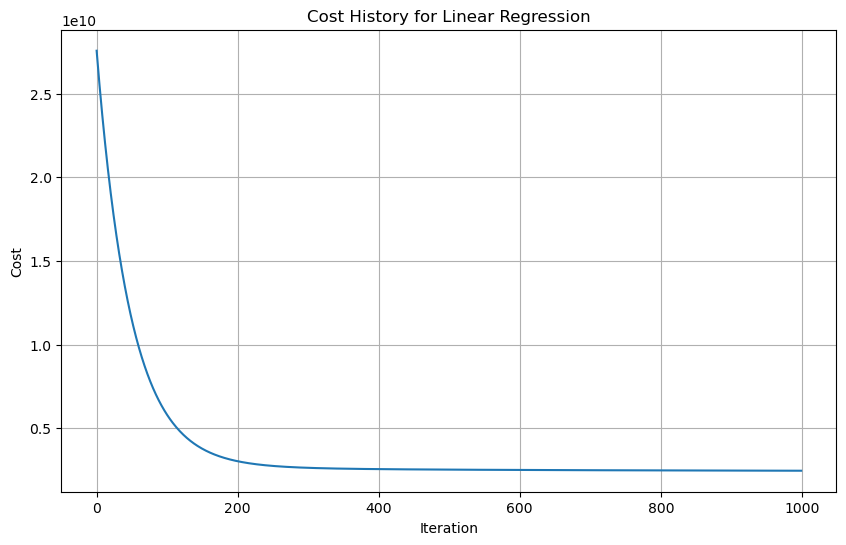

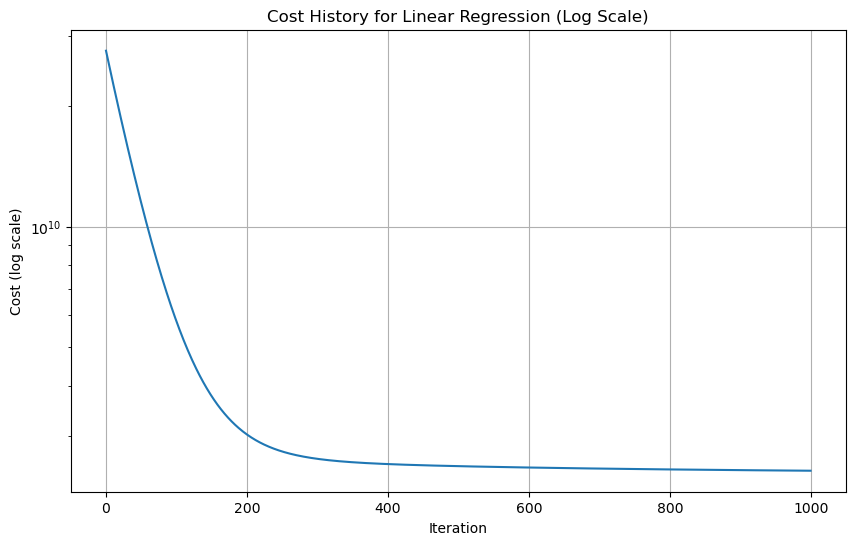

In [233]:
# Plotting the cost history for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history)
plt.title('Cost History for Linear Regression')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Let's also see the cost in log scale to better visualize the convergence
plt.figure(figsize=(10, 6))
plt.semilogy(range(len(cost_history)), cost_history)
plt.title('Cost History for Linear Regression (Log Scale)')
plt.xlabel('Iteration')
plt.ylabel('Cost (log scale)')
plt.grid(True)
plt.show()

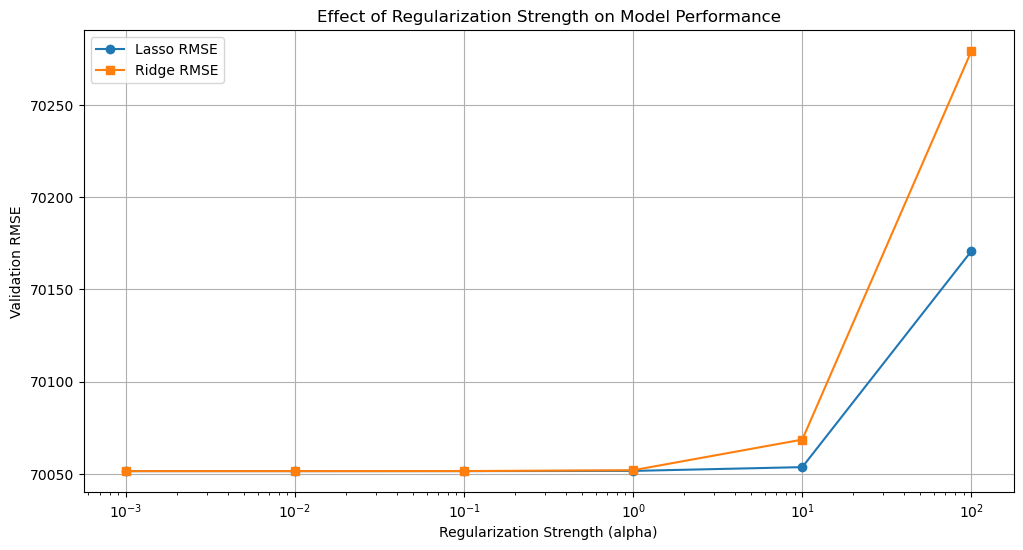

Effect of Regularization Strength (Alpha):


,Alpha,Lasso_RMSE,Ridge_RMSE
0,0.001,70051.495433,70051.495594
1,0.010,70051.496403,70051.498031
2,0.100,70051.506199,70051.524510
3,1.000,70051.613875,70051.988191
4,10.000,70053.661881,70068.577940
5,100.000,70170.741832,70279.120081


In [235]:
# Let's analyze the effect of regularization strength (alpha) on model performance
# We'll use the results from the hyperparameter tuning

# Prepare data from lasso_results and ridge_results
lasso_alphas = [result['alpha'] for result in lasso_results]
lasso_rmse = [result['validation_rmse'] for result in lasso_results]

ridge_alphas = [result['alpha'] for result in ridge_results]
ridge_rmse = [result['validation_rmse'] for result in ridge_results]

plt.figure(figsize=(12, 6))
plt.semilogx(lasso_alphas, lasso_rmse, 'o-', label='Lasso RMSE')
plt.semilogx(ridge_alphas, ridge_rmse, 's-', label='Ridge RMSE')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Validation RMSE')
plt.title('Effect of Regularization Strength on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

# Create a table comparing the effect of alpha on both models
alpha_comparison = pd.DataFrame({
    'Alpha': lasso_alphas,
    'Lasso_RMSE': lasso_rmse,
    'Ridge_RMSE': ridge_rmse
})

print("Effect of Regularization Strength (Alpha):")
alpha_comparison